In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


#load
data = pd.read_csv("resources/cn7050data.csv",encoding='latin-1',names=["sentiment","text"])

data.head()

,sentiment,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


sentiment    0
text         0
dtype: int64
sentiment
neutral     2879
positive    1363
negative     604
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4846 non-null   object
 1   text       4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


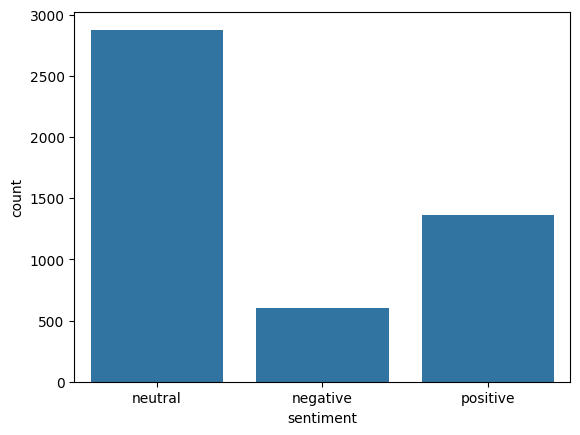

In [12]:
print(data.isnull().sum())
print(data.value_counts("sentiment"))
sns.countplot(x="sentiment",data=data)
data.info()

In [11]:
data.value_counts("sentiment")

sentiment
neutral     2879
positive    1363
negative     604
Name: count, dtype: int64

In [22]:
print("before removing duplicates:", data.shape)
print(data[data.duplicated(subset=["sentiment","text"],keep=False)])
data = data.drop_duplicates()
print("after removing duplicates:", data.shape)
data[data.duplicated(subset=["sentiment","text"],keep=False)]

before removing duplicates: (4846, 2)
     sentiment                                               text
1098   neutral  The issuer is solely responsible for the conte...
1099   neutral  The issuer is solely responsible for the conte...
1415   neutral  The report profiles 614 companies including ma...
1416   neutral  The report profiles 614 companies including ma...
2395   neutral  Ahlstrom 's share is quoted on the NASDAQ OMX ...
2396   neutral  Ahlstrom 's share is quoted on the NASDAQ OMX ...
2566   neutral  SSH Communications Security Corporation is hea...
2567   neutral  SSH Communications Security Corporation is hea...
3093   neutral  Proha Plc ( Euronext :7327 ) announced today (...
3094   neutral  Proha Plc ( Euronext :7327 ) announced today (...
3205   neutral  The company serves customers in various indust...
3206   neutral  The company serves customers in various indust...
after removing duplicates: (4840, 2)


,sentiment,text


In [23]:
# lowercase all the text. probabely not needed but just to be sure
data['sentiment'] = data['sentiment'].str.lower()

/var/folders/vc/3kfwh15d7234657gp2jqxqj80000gn/T/ipykernel_79352/2970833324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = data['sentiment'].str.lower()


# Sampling
**'stratify'** sampling to ensure each split has the same proportion of positive/negative/neutral labels.
neutral     2879
positive    1363
negative     604